In [1]:
import ROOT
import sys,os,string,json
import makeCanvas

from Utilities import getListOfTypes,maxval,movetofront

def calculate(r=None):
    if  "job_cpu_time" in r and "job_wall_time" in r and float(r["job_wall_time"]) > 0:
        r["job_efficiency"] = float(r["job_cpu_time"])/float(r["job_wall_time"])
    else:
        r["job_efficiency"] = -.1
    if float(r["event_count"]) > 0 :
        r["time_per_event"] = float(r["duration"])/float(r["event_count"])
    

here = os.path.join(os.getenv("PWD"),"data")

print (here)

files = []
for (path, dirnames, filenames) in os.walk(here):
    for f in filenames:
        if "json" in f and "combined" not in f:
            files.append(os.path.join(path,f))
            
#print (files)

data = []
for f in files:
    #print (f)
    jsonfile = open(f,'r')
    thing = json.load(jsonfile)
    if thing["event_count"] == 0 :
        continue
    data.append(thing)
   # print (f,data)
    jsonfile.close()
    
o = open("combined.json",'w')
json.dump(data,o)
o.close()

listofsites=getListOfTypes(data,"job_site",[])
listofsites=movetofront(listofsites,"US_FermiGrid")
print (listofsites)

Welcome to JupyROOT 6.24/02
/Users/schellma/Dropbox/new/DataChallengeWork-Loginator/analysis/data
['US_FermiGrid', 'BR_CBPF', 'FR_CCIN2P3', 'RU_JINR', 'UK_QMUL', 'UK_RAL-Tier1', 'US_Michigan', 'US_Wisconsin']


In [2]:
i = open("combined.json",'r')
records = json.load(i)
#print (records)

classtypes = {"sites":"job_site","rses":"rse","users":"user","apps":"application_name","tiers":"data_tier","expts":"run_type"}#"cpu":"job_cpu_time","wall":"job_wall_time"}

#quantities = {"art_cpu_efficiency"}

classlists = {}
for c in classtypes:
    classlists[c] = []
    
classlists["sites"].append("US_FermiGrid")

for r in records:
   # print (r)
    for c in classtypes:
        k = classtypes[c]
        if k in r and r[k] not in classlists[c] and r[k] != None:
            classlists[c].append(r[k])
 
classlists["sites"]=listofsites

for c in classlists:
    print (c, classlists[c])


    
    #print (r)
    # if  "job_cpu_time" in r and "job_wall_time" in r and float(r["job_wall_time"]) > 0:
    #     r["job_art_cpu_efficiency"] = float(r["job_cpu_time"])/float(r["job_wall_time"])
    # else:
    #     r["job_art_cpu_efficiency"] = -.1
    #print (r["job_site"],r["job_art_cpu_efficiency"])
    

sites ['US_FermiGrid', 'BR_CBPF', 'FR_CCIN2P3', 'RU_JINR', 'UK_QMUL', 'UK_RAL-Tier1', 'US_Michigan', 'US_Wisconsin']
rses ['FNAL_DCACHE']
users ['schellma']
apps ['test', 'eventdump']
tiers ['full-reconstructed']
expts ['protodune-sp']


In [3]:
hists = {}
hists["art_cpu_efficiency"]={}
hists["art_cpu_efficiency"]["sites"]={}
hists["eff_vs_time_per_event"]={}
hists["eff_vs_time_per_event"]["sites"]={}
hists["startup_time"]={}
hists["startup_time"]["sites"]={}
i = 1
for s in classlists["sites"]:
    print (s)
    name = "art_cpu_efficiency_"
    hists["art_cpu_efficiency"]["sites"][s] = ROOT.TH1D(name+s,name,20,0.,1.)
    hists["art_cpu_efficiency"]["sites"][s].SetLineColor(i)
    hists["art_cpu_efficiency"]["sites"][s].GetXaxis().SetTitle("CPU art_cpu_efficiency")
    hists["art_cpu_efficiency"]["sites"][s].GetYaxis().SetTitle("Number/bin")
    name = "eff_vs_time_per_event_"
    hists["eff_vs_time_per_event"]["sites"][s] = ROOT.TH2D(name+s,name,40,0.,100.,20,0.,1.)
    hists["eff_vs_time_per_event"]["sites"][s].SetLineColor(i)
    hists["eff_vs_time_per_event"]["sites"][s].GetYaxis().SetTitle("CPU art_cpu_efficiency")
    hists["eff_vs_time_per_event"]["sites"][s].GetXaxis().SetTitle("time per event, seconds")
    name = "startup_time_"
    hists["startup_time"]["sites"][s] = ROOT.TH1D(name+s,name,70,0.,700.)
    hists["startup_time"]["sites"][s].SetLineColor(i)
    hists["startup_time"]["sites"][s].GetYaxis().SetTitle("Number/bin")
    hists["startup_time"]["sites"][s].GetXaxis().SetTitle("startup time per job, seconds")
   
   
    
    i+=1
    if i == 5: i+=1
    
i = 1
hists["art_cpu_efficiency"]["apps"]={}
for a in classlists["apps"]:
    name = "cpu art_cpu_efficiency_"
    hists["art_cpu_efficiency"]["apps"][a] = ROOT.TH1D(name+a,name,20,0.,1.)
    hists["art_cpu_efficiency"]["apps"][a].SetLineColor(i)
    hists["art_cpu_efficiency"]["apps"][a].GetXaxis().SetTitle("CPU art_cpu_efficiency")
    hists["art_cpu_efficiency"]["apps"][a].GetYaxis().SetTitle("Number/bin")
    i +=1
    

US_FermiGrid
BR_CBPF
FR_CCIN2P3
RU_JINR
UK_QMUL
UK_RAL-Tier1
US_Michigan
US_Wisconsin


In [4]:
    
for r in records:
    if "job_site" not in r:
        continue
    site = r["job_site"]
    if site == None:
        continue
    calculate(r)
    if "art_cpu_efficiency" not in r: continue
    eff = r["art_cpu_efficiency"]
    hists["art_cpu_efficiency"]["sites"][site].Fill(eff)
    if "startup_time" in r:
        hists["startup_time"]["sites"][site].Fill(r["startup_time"])
    hists["eff_vs_time_per_event"]["sites"][site].Fill(r["time_per_event"],eff)
    if "application_name" not in r: continue
    hists["art_cpu_efficiency"]["apps"][r["application_name"]].Fill(eff)
    #print(r["time_per_event"],eff)
    

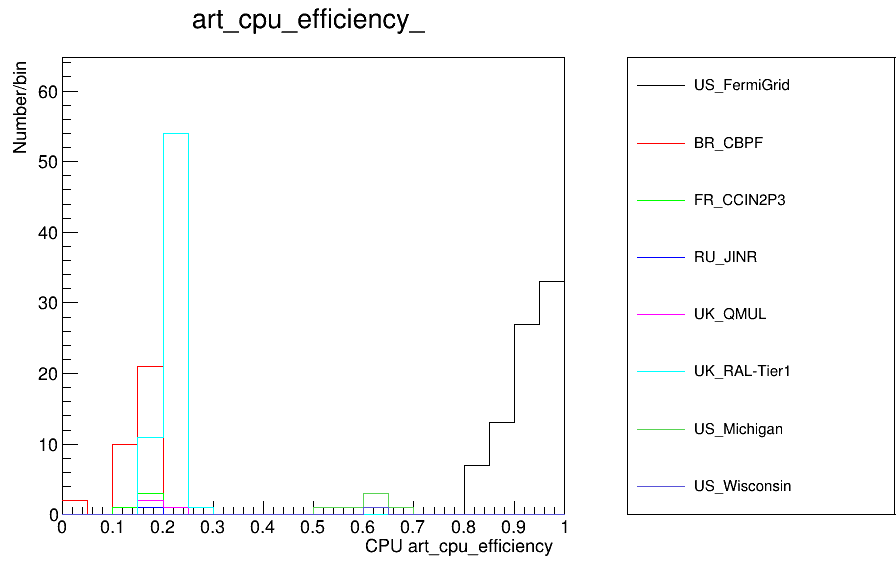

In [5]:

    
ROOT.gStyle.SetOptStat(0)
    
name = "efficiency"
c1 = ROOT.TCanvas("c1","c1",900,600)
pad1 = ROOT.TPad(" pad1 "," pad1 " ,0 ,0.0 ,0.7 ,1)
pad1.Draw ();
pad1.cd ();

#thelegend = makeCanvas.makeLegendPad("legend")
leg1 = ROOT.TLegend(0,0,1,1)


m = maxval(histSet=hists["art_cpu_efficiency"]["sites"])
classlists["sites"]=movetofront(classlists["sites"],"US_FermiGrid")
for s in classlists["sites"]:
    if s == classlists["sites"][0]:
        hists["art_cpu_efficiency"]["sites"][s].SetMaximum(m*1.2)
        hists["art_cpu_efficiency"]["sites"][s].Draw()
    else:
        hists["art_cpu_efficiency"]["sites"][s].Draw("same")
    leg1.AddEntry(hists["art_cpu_efficiency"]["sites"][s],s,'ls')
    
c1.cd ();
pad2 = ROOT.TPad(" pad2 "," pad2 " ,0.7 ,0.1 ,1 ,0.9);
pad2.Draw();
pad2.cd();
leg1.Draw()

c1.Draw()


max 27.0
first US_FermiGrid
TH1.Print Name  = startup_time_US_FermiGrid, Entries= 81, Total sum= 81
TH1.Print Name  = startup_time_BR_CBPF, Entries= 33, Total sum= 33
TH1.Print Name  = startup_time_FR_CCIN2P3, Entries= 4, Total sum= 4
TH1.Print Name  = startup_time_RU_JINR, Entries= 1, Total sum= 1
TH1.Print Name  = startup_time_UK_QMUL, Entries= 3, Total sum= 3
TH1.Print Name  = startup_time_UK_RAL-Tier1, Entries= 66, Total sum= 66
TH1.Print Name  = startup_time_US_Michigan, Entries= 6, Total sum= 6
TH1.Print Name  = startup_time_US_Wisconsin, Entries= 1, Total sum= 1


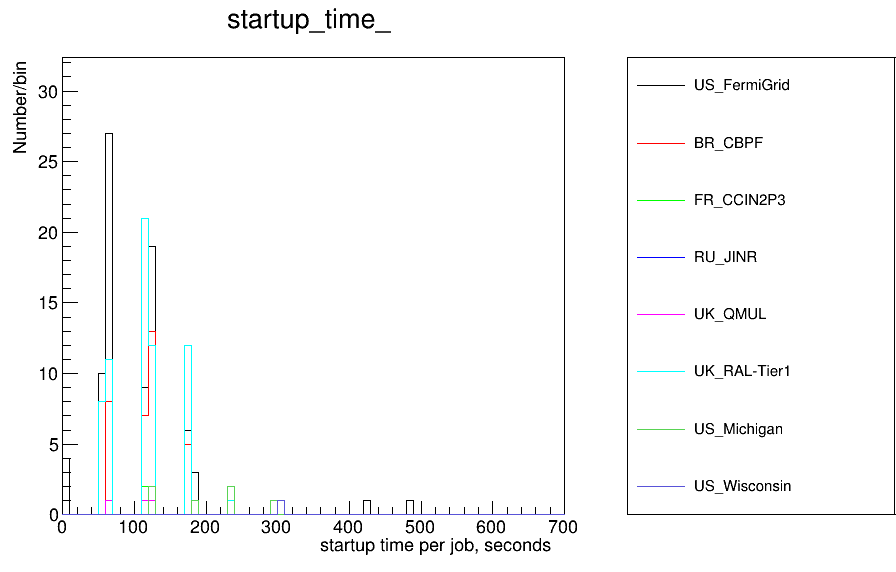

In [6]:
ROOT.gStyle.SetOptStat(0)

name = "statup time"
c3 = ROOT.TCanvas("c3","c3",900,600)

pad13 = ROOT.TPad("pad13 ","pad13 " ,0 ,0.0 ,0.7 ,1)
pad13.Draw();
pad13.cd();

#thelegend = makeCanvas.makeLegendPad("legend")
leg13 = ROOT.TLegend(0,0,1,1)


m = maxval(histSet=hists["startup_time"]["sites"])
print ("max",m)

print ("first",classlists["sites"][0])

for s in classlists["sites"]:
    hists["startup_time"]["sites"][s].Print("")
    if s == classlists["sites"][0]:
        hists["startup_time"]["sites"][s].SetMaximum(m*1.2)
        hists["startup_time"]["sites"][s].Draw()
    else:
        hists["startup_time"]["sites"][s].Draw("same")
    leg13.AddEntry(hists["startup_time"]["sites"][s],s,'ls')


c3.cd ();
pad23 = ROOT.TPad(" pad23 "," pad23 " ,0.7 ,0.1 ,1 ,0.9);
pad23.Draw();
pad23.cd();
leg13.Draw()

c3.Draw()

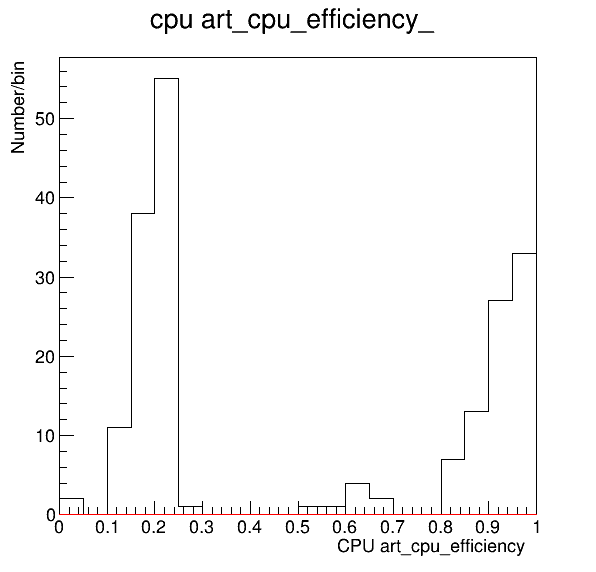

In [7]:
c1a = ROOT.TCanvas("c1a","c1a",600,600)
leg1a = ROOT.TLegend(0.85, 0.10, 1.00, 0.90)
    
for s in classlists["apps"]:
    if s == classlists["apps"][0]:
        hists["art_cpu_efficiency"]["apps"][s].Draw()
    else:
        hists["art_cpu_efficiency"]["apps"][s].Draw("same")
    leg1a.AddEntry(hists["art_cpu_efficiency"]["apps"][s],s,'l')

#leg1a.Draw()
c1a.Draw()

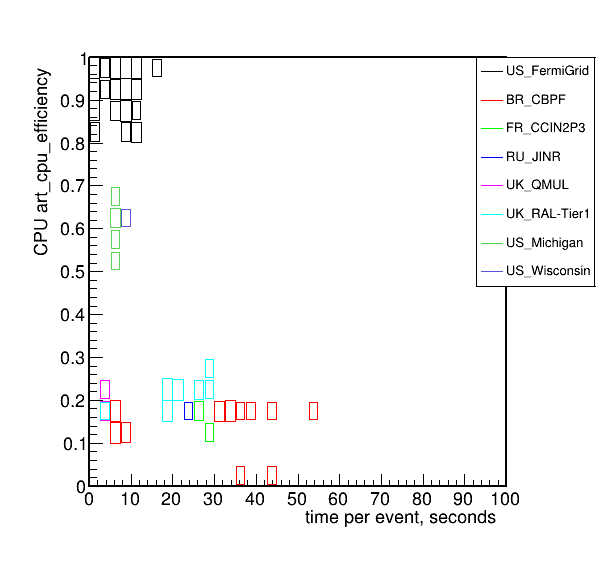

In [8]:
c2 = makeCanvas.makeCanvas("c2")
c2.SetLogz()
hists["eff_vs_time_per_event"]["sites"]["US_FermiGrid"].Draw()
leg2 = ROOT.TLegend(0.8, 0.50, 1.00, 0.90)
    
for s in classlists["sites"]:
    if s == classlists["sites"][0]:
        hists["eff_vs_time_per_event"]["sites"][s].Draw("box")
    else:
        hists["eff_vs_time_per_event"]["sites"][s].Draw("box same")
    leg2.AddEntry(hists["eff_vs_time_per_event"]["sites"][s],s,'l')

leg2.Draw()
c2.Draw()
    
        
    
    